In [1]:
import numpy as np
import matplotlib.pyplot as plt
import folie as fl
from mpl_toolkits.mplot3d import Axes3D
import math
from math import *
# %matplotlib widget

# Definition of the Function

Let be a function f from ℝ² into ℝ. For any couple (x, y) in ℝ² :

In [2]:
def f(x, y):
    return 2*x**2 - x*y + 2*y**2

We choose a range of values from the set of real numbers ℝ for x and y (I will take for the example [-100, 100] with 100 values for each variable).

In [3]:
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
# n create an array of values containing all value pairs (xi, yi) for xi in x, and yi in y.
X, Y = np.meshgrid(x, y)  
# compute the values of our function defined above for each pair of values (xi, yi) and store these values in a new variable Z :
Z = f(X,Y)

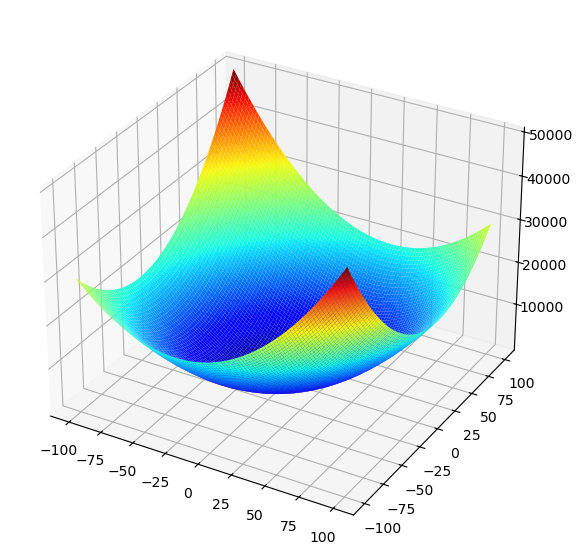

In [5]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')
